In [1]:
import pandas as pd

# load data
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
print(train_df.head())
print(train_df.info())
print(train_df.describe())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
<c

In [2]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('train.csv')

# Define the columns to fill missing values
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']

# Fill missing numerical values with the median
for col in numerical_columns:
    if col in train_df.columns:
        train_df[col].fillna(train_df[col].median(), inplace=True)

# Fill missing categorical values with the mode
for col in categorical_columns:
    if col in train_df.columns:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Convert categorical columns to numerical using one-hot encoding
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Drop unnecessary columns
train_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# Separate features and target variable
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

# Save preprocessed training data
X.to_csv('preprocessed_train_X.csv', index=False)
y.to_csv('preprocessed_train_y.csv', index=False)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed training data
X = pd.read_csv('preprocessed_train_X.csv')
y = pd.read_csv('preprocessed_train_y.csv').squeeze()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Define the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the classifier
random_forest.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = random_forest.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# Save the model
joblib.dump(random_forest, 'random_forest_model.pkl')



Random Forest Accuracy: 0.7901092581943646


['random_forest_model.pkl']

In [4]:
from sklearn.ensemble import GradientBoostingClassifier


# Train Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate Gradient Boosting classifier
y_pred = gb_clf.predict(X_val)
gb_accuracy = accuracy_score(y_val, y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

# Save the model
joblib.dump(gb_clf, 'gb_classifier.pkl')


Gradient Boosting Accuracy: 0.7814836112708453


['gb_classifier.pkl']

In [5]:
from sklearn.svm import SVC

# Train SVM classifier
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluate SVM classifier
y_pred = svm_clf.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_pred)
print(f"SVM Accuracy: {svm_accuracy}")

# Save the model
joblib.dump(svm_clf, 'svm_classifier.pkl')


SVM Accuracy: 0.5290396779758482


['svm_classifier.pkl']

Random Forest Accuracy: 0.7901092581943646
Logistic Regression Accuracy: 0.7487061529614721
Support Vector Classifier Accuracy: 0.5290396779758482
Best Classifier: RandomForestClassifier with Accuracy: 0.7901092581943646


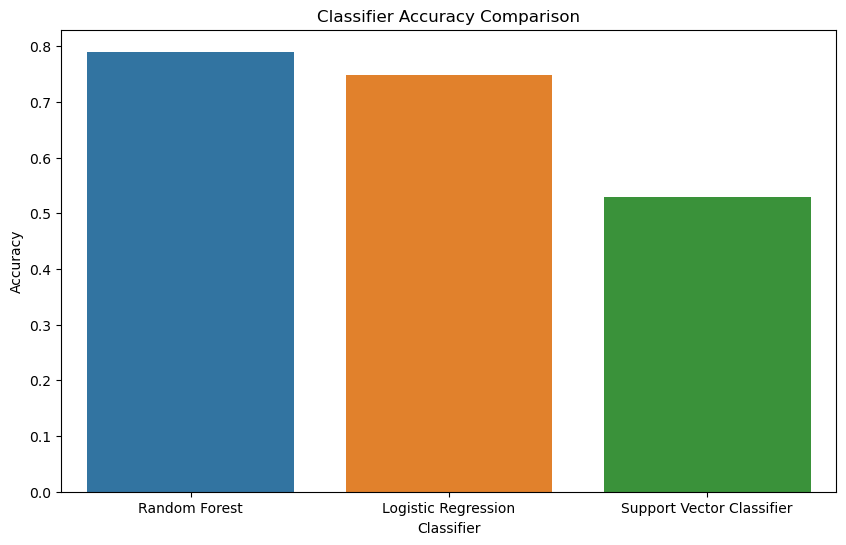

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed training data
X = pd.read_csv('preprocessed_train_X.csv')
y = pd.read_csv('preprocessed_train_y.csv').squeeze()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
}

# Train and evaluate each classifier
best_classifier = None
best_accuracy = 0
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = clf

# Print the results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy}")

print(f"Best Classifier: {best_classifier.__class__.__name__} with Accuracy: {best_accuracy}")

# Save the best model
joblib.dump(best_classifier, 'best_classifier.pkl')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()


In [15]:
import pandas as pd
import joblib

# Load the best classifier
best_classifier = joblib.load('best_classifier.pkl')

# Load the test dataset
test_df = pd.read_csv('test.csv')

# Define the columns to fill missing values
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']

# Handle missing values for test data
for col in numerical_columns:
    if col in test_df.columns:
        test_df[col].fillna(test_df[col].median(), inplace=True)

# Fill missing categorical values with the mode
for col in categorical_columns:
    if col in test_df.columns:
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Convert categorical columns to numerical using one-hot encoding
test_df = pd.get_dummies(test_df, columns=[col for col in categorical_columns if col in test_df.columns], drop_first=True)

# Align test_df with the training data to ensure all columns match
# Note: Make sure that the variable X represents the training data's features in your environment
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# Standardize the test data
scaler = joblib.load('scaler.pkl')
test_df = scaler.transform(test_df)

# Make predictions on the test data
test_predictions = best_classifier.predict(test_df)

# Load the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

# Create the submission file based on the sample submission structure
submission = pd.DataFrame({
    'PassengerId': sample_submission['PassengerId'],
    'Transported': test_predictions
})

# Ensure the 'Transported' column is of boolean type as required
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created and saved as submission.csv")


Submission file created and saved as submission.csv
